In [2]:
# CAUSAL INFERENCE IN PYTHON

## PART 1: PROBLEM: HOTEL CANCELLATIONS

### GOALS:
#### How to use correlation and association to help the business
#### Use Modeling to understand the system and draw conclusions and develop experiments
#### Work with the team to develop a complex business model


### Questions:
#### What causes cancellations?
#### What can the business do to decrease cancellations?

!pip install pytimetk

In [3]:
# prompt: import pandas, numpy, pytimetk, matrix from missingno, stastsmodels, GLM, Binomial, logit, roc_auc_score
import pandas as pd
import numpy as np
import pytimetk as tk
from missingno import matrix
import statsmodels.api as sm
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families.links import logit
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import roc_auc_score

In [4]:
hotel_cancellations_raw_df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

In [5]:
hotel_cancellations_raw_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [12]:
hotel_cancellations_raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
# COST Analysis

# How many people cancel?

cancellation_counts = hotel_cancellations_raw_df['is_canceled'].value_counts().reset_index()
cancellation_counts.columns = ['is_canceled', 'n']
cancellation_counts['prop'] = cancellation_counts['n']/cancellation_counts['n'].sum()

In [8]:
cancellation_counts

,is_canceled,n,prop
0,0,75166,0.629584
1,1,44224,0.370416


In [13]:
# How much does this cost the hotel?
cost = 44224 * 200 * 3.4
formatted_cost = "${:,.0f}".format(cost)
formatted_cost

'$30,072,320'

In [14]:
# 10% of the cost
ten_percent_cost = 0.1*cost
formatted_ten_percent_cost = "${:,.0f}".format(ten_percent_cost)
formatted_ten_percent_cost

'$3,007,232'

In [15]:
# Basic Feature Engineering
hotel_cancellations_df = hotel_cancellations_raw_df.copy()

In [16]:
# Adding New Features
hotel_cancellations_df['total_stay'] = hotel_cancellations_df['stays_in_weekend_nights'] + hotel_cancellations_df['stays_in_week_nights']

In [17]:
hotel_cancellations_df['total_guests'] = hotel_cancellations_df['adults'] + hotel_cancellations_df['children'] + hotel_cancellations_df['babies']

In [18]:
hotel_cancellations_df['different_room_assigned'] = (hotel_cancellations_df['reserved_room_type'] != hotel_cancellations_df['assigned_room_type']).astype(int)

In [19]:
# Dropping the original columns
hotel_cancellations_df.drop(
    columns=[
        'stays_in_weekend_nights',
        'stays_in_week_nights',
        'adults',
        'children',
        'babies',
        'reserved_room_type',
        'assigned_room_type'
    ],
    inplace=True
)

In [20]:
hotel_cancellations_df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119390 rows of 28 columns
hotel:                           object            ['Resort Hotel', 'Res ...
is_canceled:                     int64             [0, 0, 0, 0, 0, 0, 0, ...
lead_time:                       int64             [342, 737, 7, 13, 14, ...
arrival_date_year:               int64             [2015, 2015, 2015, 20 ...
arrival_date_month:              object            ['July', 'July', 'Jul ...
arrival_date_week_number:        int64             [27, 27, 27, 27, 27,  ...
arrival_date_day_of_month:       int64             [1, 1, 1, 1, 1, 1, 1, ...
meal:                            object            ['BB', 'BB', 'BB', 'B ...
country:                         object            ['PRT', 'PRT', 'GBR', ...
market_segment:                  object            ['Direct', 'Direct',  ...
distribution_channel:            object            ['Direct', 'Direct',  ...
is_repeated_guest:               int64             [0, 0, 0, 0, 0, 0, 0, ...
previous_ca

<Axes: >

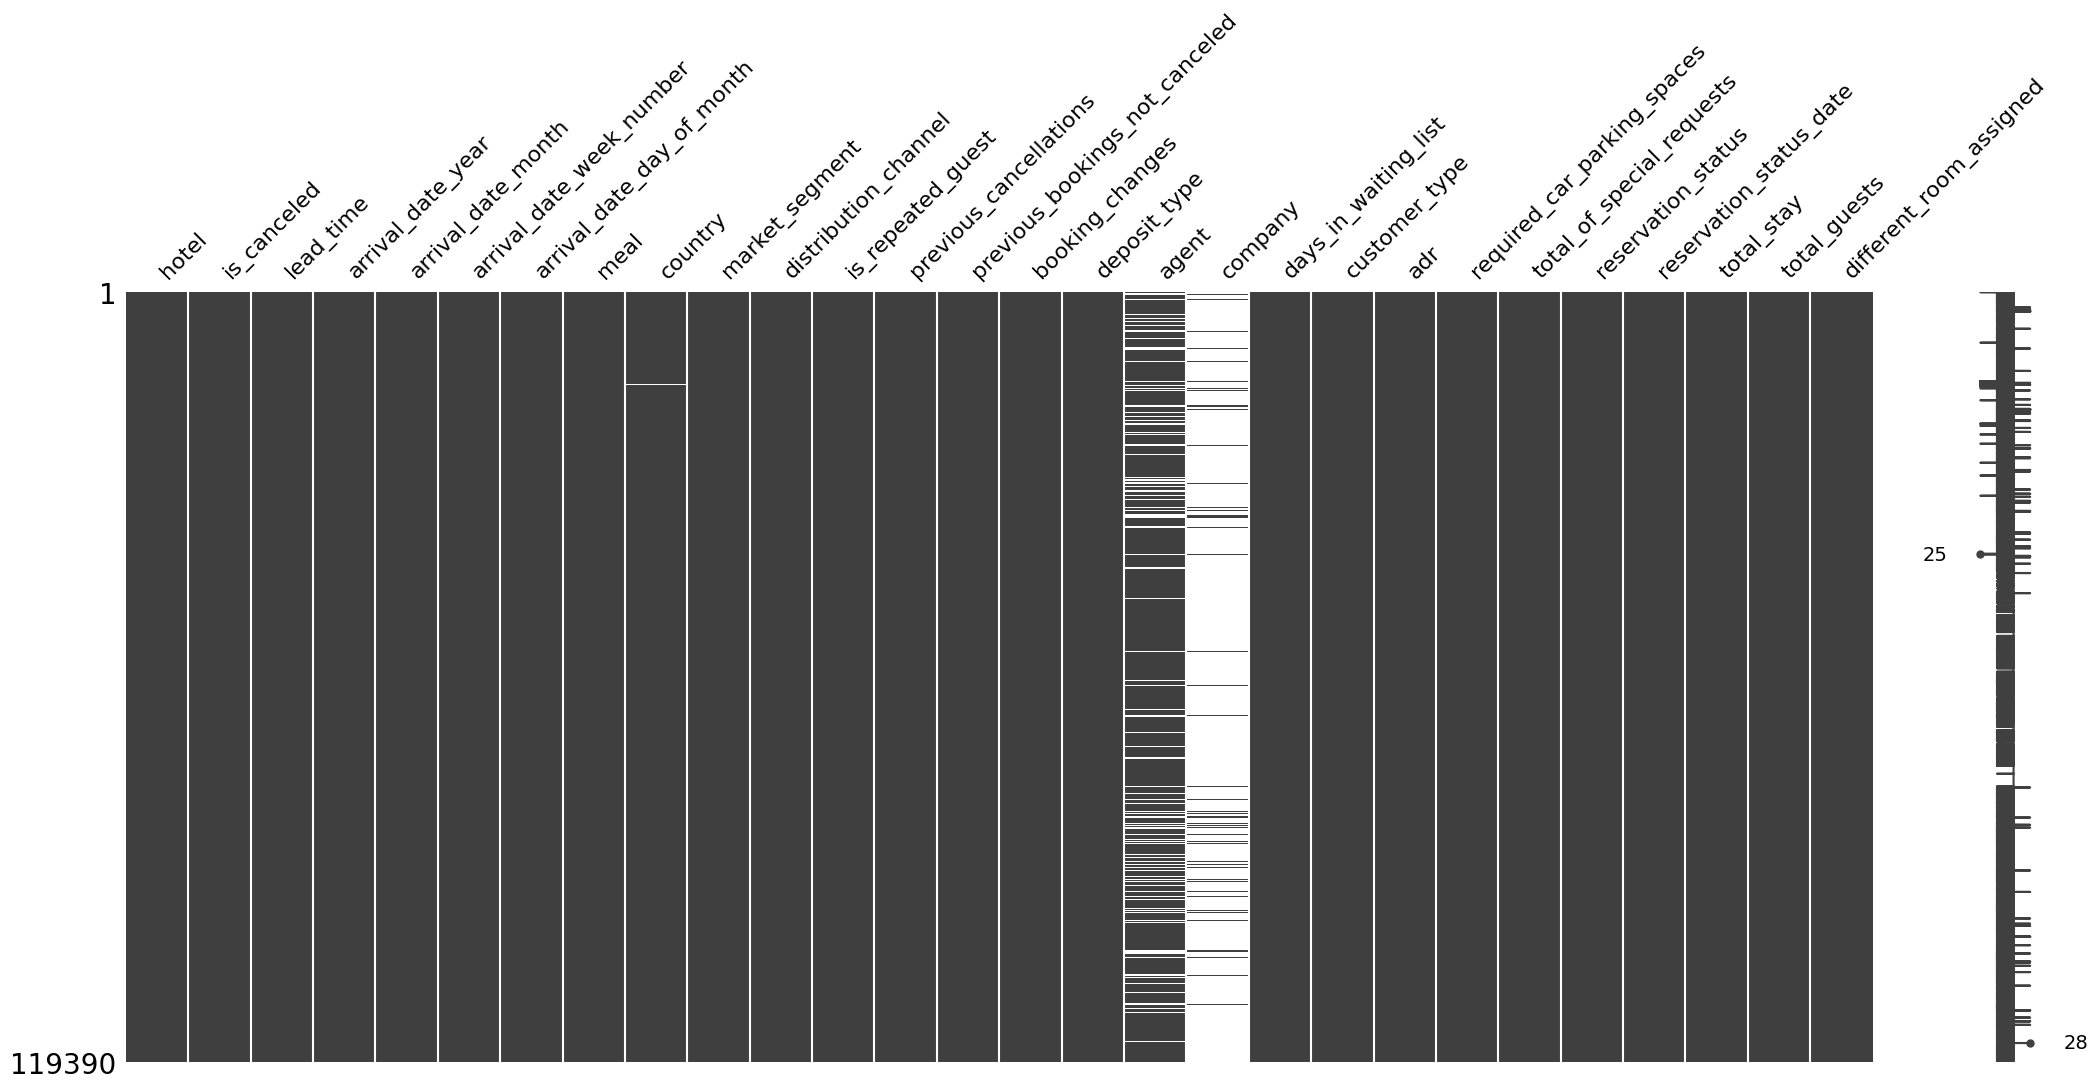

In [25]:
# Fix Missing Values

# Plot missing values
matrix(hotel_cancellations_df)



In [26]:
# Count by country with sorting
country_count = hotel_cancellations_df['country'].value_counts().reset_index()
country_count.columns = ['country', 'count']

country_count

,country,count
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
...,...,...
172,DJI,1
173,BWA,1
174,HND,1
175,VGB,1


In [27]:
# Fix missing values and drop columns
hotel_cancellations_df = hotel_cancellations_df.drop(columns=['company', 'agent'])

hotel_cancellations_df['country'] = hotel_cancellations_df['country'].fillna('PRT')

In [28]:
hotel_cancellations_df.dropna(inplace=True)

In [29]:
# Drop Innecessary columns
hotel_cancellations_df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119386 rows of 26 columns
hotel:                           object            ['Resort Hotel', 'Res ...
is_canceled:                     int64             [0, 0, 0, 0, 0, 0, 0, ...
lead_time:                       int64             [342, 737, 7, 13, 14, ...
arrival_date_year:               int64             [2015, 2015, 2015, 20 ...
arrival_date_month:              object            ['July', 'July', 'Jul ...
arrival_date_week_number:        int64             [27, 27, 27, 27, 27,  ...
arrival_date_day_of_month:       int64             [1, 1, 1, 1, 1, 1, 1, ...
meal:                            object            ['BB', 'BB', 'BB', 'B ...
country:                         object            ['PRT', 'PRT', 'GBR', ...
market_segment:                  object            ['Direct', 'Direct',  ...
distribution_channel:            object            ['Direct', 'Direct',  ...
is_repeated_guest:               int64             [0, 0, 0, 0, 0, 0, 0, ...
previous_ca

In [30]:
hotel_cancellations_df.drop(columns=['reservation_status_date'], inplace=True)

In [31]:
# Initial Processing Complete
hotel_cancellations_df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119386 rows of 25 columns
hotel:                           object            ['Resort Hotel', 'Res ...
is_canceled:                     int64             [0, 0, 0, 0, 0, 0, 0, ...
lead_time:                       int64             [342, 737, 7, 13, 14, ...
arrival_date_year:               int64             [2015, 2015, 2015, 20 ...
arrival_date_month:              object            ['July', 'July', 'Jul ...
arrival_date_week_number:        int64             [27, 27, 27, 27, 27,  ...
arrival_date_day_of_month:       int64             [1, 1, 1, 1, 1, 1, 1, ...
meal:                            object            ['BB', 'BB', 'BB', 'B ...
country:                         object            ['PRT', 'PRT', 'GBR', ...
market_segment:                  object            ['Direct', 'Direct',  ...
distribution_channel:            object            ['Direct', 'Direct',  ...
is_repeated_guest:               int64             [0, 0, 0, 0, 0, 0, 0, ...
previous_ca

<Axes: >

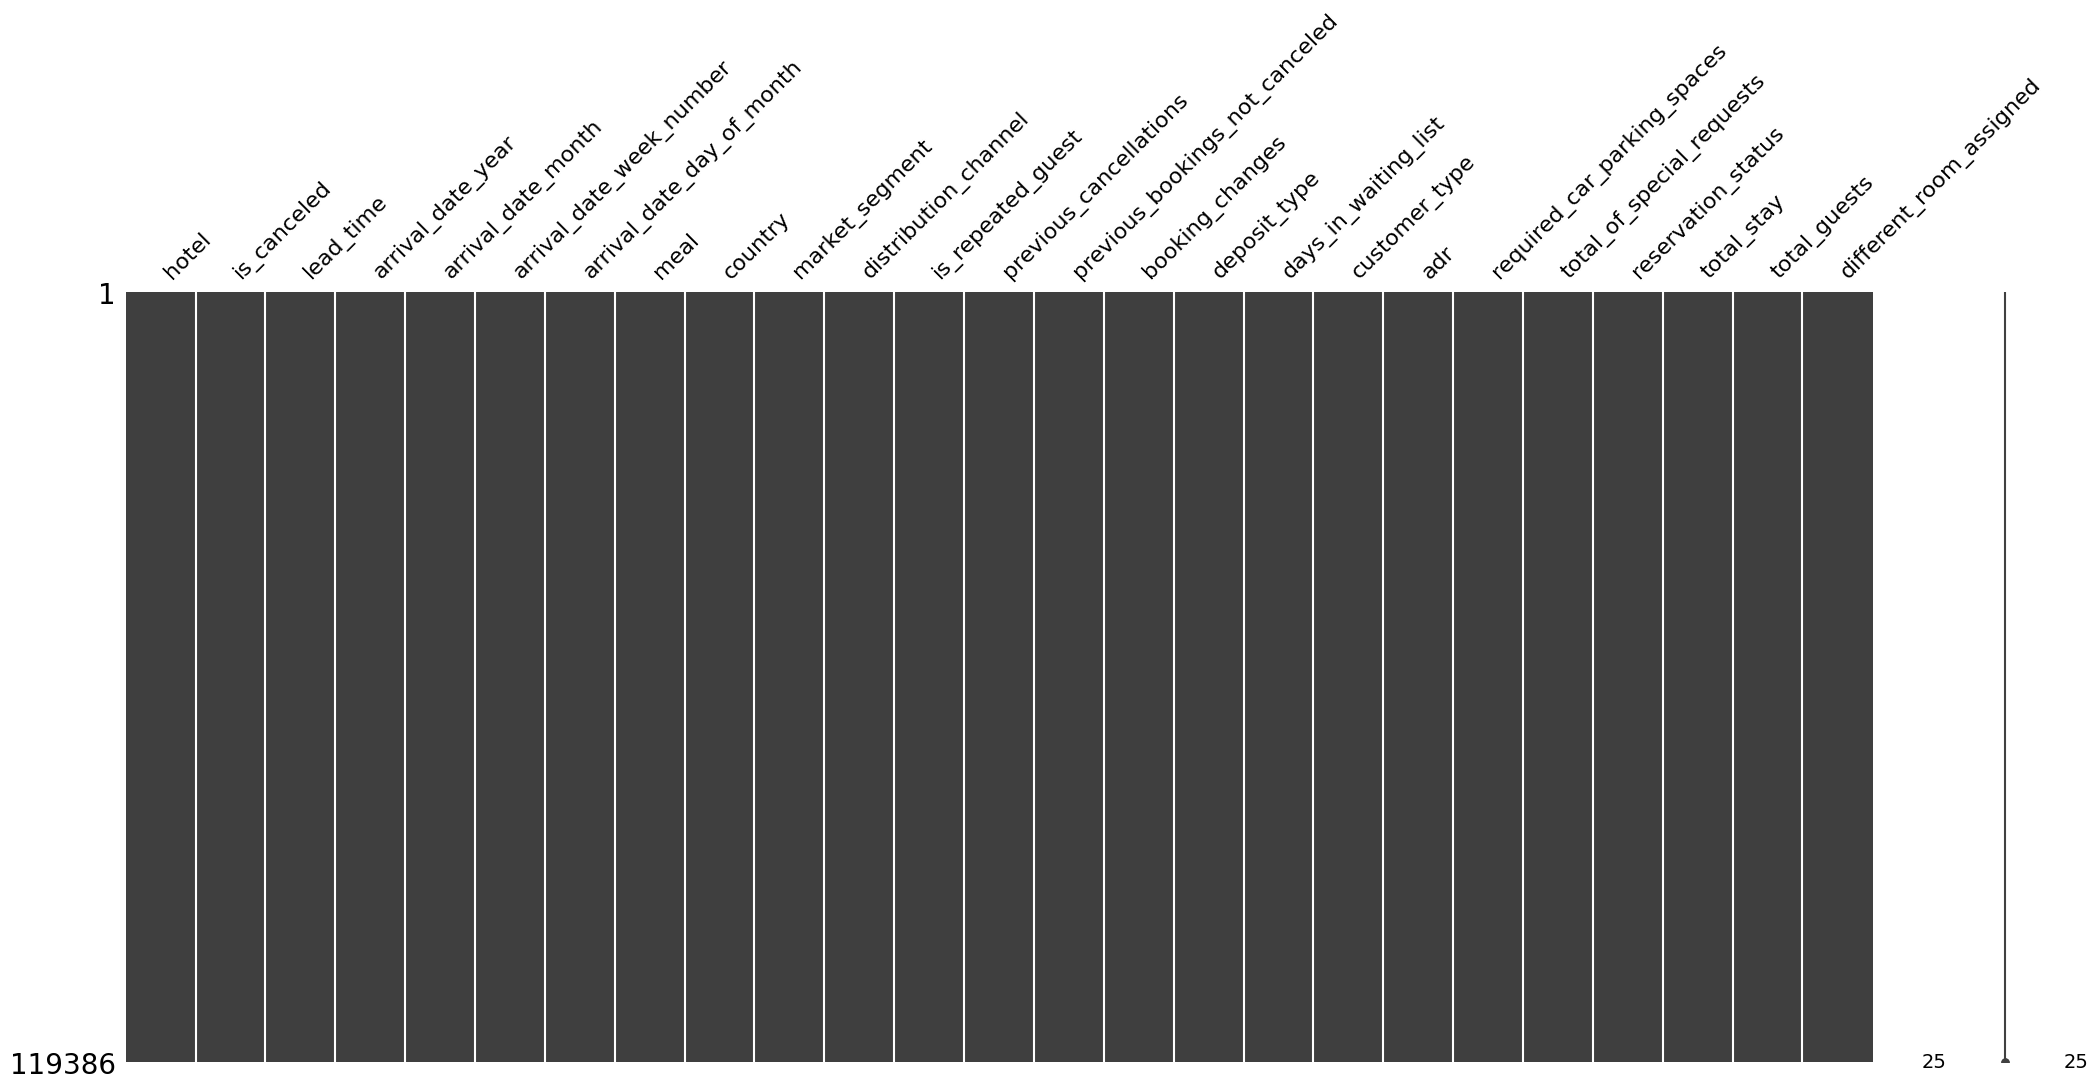

In [32]:
matrix(hotel_cancellations_df)

In [33]:
hotel_cancellations_df.to_csv('/kaggle/working/hotel_cancellations_clean.csv')

In [42]:
# 2.0 CORRELATION (LEVEL 1: Association)
# Using the new correlation funnel from pytimetk

# Binarize

df_binarized = hotel_cancellations_df.binarize()

In [43]:
df_binarized.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119386 rows of 104 columns
lead_time__0.0_18.0:                     int64             [0, 0, 1, 1,  ...
lead_time__18.0_69.0:                    int64             [0, 0, 0, 0,  ...
lead_time__69.0_160.0:                   int64             [0, 0, 0, 0,  ...
lead_time__160.0_737.0:                  int64             [1, 1, 0, 0,  ...
arrival_date_week_number__1.0_16.0:      int64             [0, 0, 0, 0,  ...
arrival_date_week_number__16.0_28.0:     int64             [1, 1, 1, 1,  ...
arrival_date_week_number__28.0_38.0:     int64             [0, 0, 0, 0,  ...
arrival_date_week_number__38.0_53.0:     int64             [0, 0, 0, 0,  ...
arrival_date_day_of_month__1.0_8.0:      int64             [1, 1, 1, 1,  ...
arrival_date_day_of_month__8.0_16.0:     int64             [0, 0, 0, 0,  ...
arrival_date_day_of_month__16.0_23.0:    int64             [0, 0, 0, 0,  ...
arrival_date_day_of_month__23.0_31.0:    int64             [0, 0, 0, 0,  ...
adr__-6.4_

In [44]:
# Correlate

df_correlated = df_binarized.correlate(target='is_canceled__1')

In [45]:
df_correlated.head(10)

,feature,bin,correlation
25,is_canceled,1,1.000000
24,is_canceled,0,-1.000000
100,reservation_status,Check-Out,-1.000000
99,reservation_status,Canceled,0.978433
84,deposit_type,Non Refund,0.481488
83,deposit_type,No Deposit,-0.477942
58,country,PRT,0.331560
73,previous_cancellations,1,0.274606
72,previous_cancellations,0,-0.270962
0,lead_time,0.0_18.0,-0.270429


In [46]:
# Visualize
df_correlated.plot_correlation_funnel()

In [40]:
# Subset features
hotel_cancellations_subset_df = hotel_cancellations_df.drop(columns=['reservation_status'])

In [41]:
# Selecting Specific Columns
hotel_cancellations_subset_df = hotel_cancellations_subset_df[['is_canceled', 'deposit_type', 'country', 'previous_cancellations', 'lead_time',
                                                               'total_of_special_requests', 'different_room_assigned', 'market_segment', 
                                                               'required_car_parking_spaces', 'distribution_channel', 'hotel', 
                                                               'customer_type', 'previous_bookings_not_canceled', 'is_repeated_guest']]

In [47]:
# Creating new columns based on the 'country' column
hotel_cancellations_subset_df['country_PRT'] = (hotel_cancellations_subset_df['country'] == 'PRT').astype(int)
hotel_cancellations_subset_df['country_other'] = (hotel_cancellations_subset_df['country'] != 'PRT').astype(int)

In [48]:
# Dropping the original 'country' column
hotel_cancellations_subset_df.drop(columns=['country'], inplace=True)

In [49]:
hotel_cancellations_subset_df.to_csv('/kaggle/working/hotel_cancellations_subset.csv', index=False)

In [50]:
hotel_cancellations_subset_df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119386 rows of 15 columns
is_canceled:                     category          [0, 0, 0, 0, 0, 0, 0, ...
deposit_type:                    object            ['No Deposit', 'No De ...
previous_cancellations:          category          [0, 0, 0, 0, 0, 0, 0, ...
lead_time:                       int64             [342, 737, 7, 13, 14, ...
total_of_special_requests:       category          [0, 0, 0, 0, 1, 1, 0, ...
different_room_assigned:         category          [0, 0, 1, 0, 0, 0, 0, ...
market_segment:                  object            ['Direct', 'Direct',  ...
required_car_parking_spaces:     category          [0, 0, 0, 0, 0, 0, 0, ...
distribution_channel:            object            ['Direct', 'Direct',  ...
hotel:                           object            ['Resort Hotel', 'Res ...
customer_type:                   object            ['Transient', 'Transi ...
previous_bookings_not_canceled:  category          [0, 0, 0, 0, 0, 0, 0, ...
is_repeated

In [51]:
# 4.0 CAUSAL HYPOTHESIS

# Q1: Do groups tend to cancel more? (BAD - out of our control)
# Q2: Will reducing lead time reduce cancellations? (GOOD - within our control)

In [52]:
# * Q2: Will reducing lead time reduce cancellations? (GOOD - within our control)

In [54]:
# Simple Logistic Model

# Preparing the data
lead_time_df = hotel_cancellations_subset_df[['is_canceled', 'lead_time']].copy()
lead_time_df['lead_time_binned'] = pd.qcut(lead_time_df['lead_time'], q=4, duplicates='drop')

In [101]:
lead_time_df

,is_canceled,lead_time,lead_time_binned
0,0,342,"(160.0, 737.0]"
1,0,737,"(160.0, 737.0]"
2,0,7,"(-0.001, 18.0]"
3,0,13,"(-0.001, 18.0]"
4,0,14,"(-0.001, 18.0]"
...,...,...,...
119385,0,23,"(18.0, 69.0]"
119386,0,102,"(69.0, 160.0]"
119387,0,34,"(18.0, 69.0]"
119388,0,109,"(69.0, 160.0]"


In [55]:
# One-hot encoding (with dropping the first category to avoid multicollinearity)
lead_time_dummies = pd.get_dummies(lead_time_df['lead_time_binned'], drop_first=True)

In [58]:
lead_time_dummies

,"(18.0, 69.0]","(69.0, 160.0]","(160.0, 737.0]"
0,False,False,True
1,False,False,True
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
119385,True,False,False
119386,False,True,False
119387,True,False,False
119388,False,True,False


In [56]:
X = lead_time_dummies.astype(float)
y = lead_time_df['is_canceled'].astype(float)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608661
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119386
Model:                          Logit   Df Residuals:                   119382
Method:                           MLE   Df Model:                            3
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                 0.07662
Time:                        19:59:54   Log-Likelihood:                -72666.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7643      0.016   -108.441      0.000      -1.796      -1.732
(18.0, 69.0]     

In [57]:
# Logistic Regression produces Log-odds
np.exp(1.98) # 160+ days -> 7.2X risk of cancellation

np.exp(1.47) # 69-160 days -> 4.3.2X risk of cancellation

np.exp(1.18) # 160+ days -> 3.25X risk of cancellation

3.2543742028896707

In [59]:
# Problem: This isn't reality, lead time isn't the ony thing affecting cancellations

In [61]:
# 5.0 CONSIDERING CONFOUNDERS
# Don't know the full story yet, so we need to approximate it with a more accurate model

In [97]:
# Preprocessing
df = hotel_cancellations_subset_df.copy()

df.head()

,is_canceled,deposit_type,previous_cancellations,lead_time,total_of_special_requests,different_room_assigned,market_segment,required_car_parking_spaces,distribution_channel,hotel,customer_type,previous_bookings_not_canceled,is_repeated_guest,country_PRT,country_other
0,0,No Deposit,0,342,0,0,Direct,0,Direct,Resort Hotel,Transient,0,0,1,0
1,0,No Deposit,0,737,0,0,Direct,0,Direct,Resort Hotel,Transient,0,0,1,0
2,0,No Deposit,0,7,0,1,Direct,0,Direct,Resort Hotel,Transient,0,0,0,1
3,0,No Deposit,0,13,0,0,Corporate,0,Corporate,Resort Hotel,Transient,0,0,0,1
4,0,No Deposit,0,14,1,0,Online TA,0,TA/TO,Resort Hotel,Transient,0,0,0,1


In [98]:
df['lead_time'] = pd.qcut(df['lead_time'], q=4, duplicates='drop')

In [99]:
df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119386 rows of 15 columns
is_canceled:                     category          [0, 0, 0, 0, 0, 0, 0, ...
deposit_type:                    object            ['No Deposit', 'No De ...
previous_cancellations:          category          [0, 0, 0, 0, 0, 0, 0, ...
lead_time:                       category          [Interval(160.0, 737. ...
total_of_special_requests:       category          [0, 0, 0, 0, 1, 1, 0, ...
different_room_assigned:         category          [0, 0, 1, 0, 0, 0, 0, ...
market_segment:                  object            ['Direct', 'Direct',  ...
required_car_parking_spaces:     category          [0, 0, 0, 0, 0, 0, 0, ...
distribution_channel:            object            ['Direct', 'Direct',  ...
hotel:                           object            ['Resort Hotel', 'Res ...
customer_type:                   object            ['Transient', 'Transi ...
previous_bookings_not_canceled:  category          [0, 0, 0, 0, 0, 0, 0, ...
is_repeated

In [100]:
df = pd.get_dummies(df, drop_first=True)

In [91]:
df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119386 rows of 119 columns
country_PRT:                        int64             [1, 1, 0, 0, 0, 0, ...
country_other:                      int64             [0, 0, 1, 1, 1, 1, ...
is_canceled_1:                      bool              [False, False, Fal ...
deposit_type_Non Refund:            bool              [False, False, Fal ...
deposit_type_Refundable:            bool              [False, False, Fal ...
previous_cancellations_1:           bool              [False, False, Fal ...
previous_cancellations_2:           bool              [False, False, Fal ...
previous_cancellations_3:           bool              [False, False, Fal ...
previous_cancellations_4:           bool              [False, False, Fal ...
previous_cancellations_5:           bool              [False, False, Fal ...
previous_cancellations_6:           bool              [False, False, Fal ...
previous_cancellations_11:          bool              [False, False, Fal ...
previous_c

In [92]:
# Convert all dummy columns to int
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [93]:
df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119386 rows of 119 columns
country_PRT:                        int64             [1, 1, 0, 0, 0, 0, ...
country_other:                      int64             [0, 0, 1, 1, 1, 1, ...
is_canceled_1:                      int64             [0, 0, 0, 0, 0, 0, ...
deposit_type_Non Refund:            int64             [0, 0, 0, 0, 0, 0, ...
deposit_type_Refundable:            int64             [0, 0, 0, 0, 0, 0, ...
previous_cancellations_1:           int64             [0, 0, 0, 0, 0, 0, ...
previous_cancellations_2:           int64             [0, 0, 0, 0, 0, 0, ...
previous_cancellations_3:           int64             [0, 0, 0, 0, 0, 0, ...
previous_cancellations_4:           int64             [0, 0, 0, 0, 0, 0, ...
previous_cancellations_5:           int64             [0, 0, 0, 0, 0, 0, ...
previous_cancellations_6:           int64             [0, 0, 0, 0, 0, 0, ...
previous_cancellations_11:          int64             [0, 0, 0, 0, 0, 0, ...
previous_c

In [94]:
# Train/Test Split (using pandas)
train_df = df.sample(frac=0.8, random_state=123)
test_df = df.drop(train_df.index)

In [96]:
train_df.head()

,country_PRT,country_other,is_canceled_1,deposit_type_Non Refund,deposit_type_Refundable,previous_cancellations_1,previous_cancellations_2,previous_cancellations_3,previous_cancellations_4,previous_cancellations_5,...,previous_bookings_not_canceled_64,previous_bookings_not_canceled_65,previous_bookings_not_canceled_66,previous_bookings_not_canceled_67,previous_bookings_not_canceled_68,previous_bookings_not_canceled_69,previous_bookings_not_canceled_70,previous_bookings_not_canceled_71,previous_bookings_not_canceled_72,is_repeated_guest_1
28696,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95663,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105159,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52345,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
test_df.head()

,country_PRT,country_other,is_canceled_1,deposit_type_Non Refund,deposit_type_Refundable,previous_cancellations_1,previous_cancellations_2,previous_cancellations_3,previous_cancellations_4,previous_cancellations_5,...,previous_bookings_not_canceled_64,previous_bookings_not_canceled_65,previous_bookings_not_canceled_66,previous_bookings_not_canceled_67,previous_bookings_not_canceled_68,previous_bookings_not_canceled_69,previous_bookings_not_canceled_70,previous_bookings_not_canceled_71,previous_bookings_not_canceled_72,is_repeated_guest_1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# Fit Model with L1 Penalty (Lasso)
X_train = train_df.drop(columns=['is_canceled_1'])
y_train = train_df['is_canceled_1']

In [104]:
model = GLM(y_train, sm.add_constant(X_train), family=Binomial(), link=logit())
result = model.fit_regularized(method='elastic_net', alpha=0.01, L1_wt=1.0) # L1_wt = 1.0 for Lasso

In [105]:
# Is the model any good?

# Add a constant to the test data

X_test = sm.add_constant(test_df.drop(columns=['is_canceled_1']))
y_test = test_df['is_canceled_1']

In [106]:
# Make predictions
predicted_probabilities = result.predict(X_test)

In [107]:
# Calculate the ROC_AUC_Score
roc_auc = roc_auc_score(y_test, predicted_probabilities)

In [109]:
roc_auc

0.8590952349809433

In [137]:
pd.DataFrame(result.params)

,0
const,-0.160909
country_PRT,0.000000
country_other,-1.119299
deposit_type_Non Refund,2.321061
deposit_type_Refundable,0.000000
...,...
previous_bookings_not_canceled_69,0.000000
previous_bookings_not_canceled_70,0.000000
previous_bookings_not_canceled_71,0.000000
previous_bookings_not_canceled_72,0.000000


In [ ]:
np.exp(0.4) # 1.5X risk of cancellation for each additional lead time bin
np.exp(0.0) # 1X risk of cancellation for each additional lead time bin

In [110]:
# NEXT STEPS


# We have a model that predicts hotel cancellations
# We used this model to understand the system
# We can develop an experiment that tests reduction in cancellations by influencing lead time
# We can use the model to estimate the pre-treatment effect of reducing lead time



In [ ]:
# Part 2: SOLUTION: REDUCE HOTEL CANCELLATIONS

# Goals:
# - We have developed an exeperiment: Send a targeted offer to customers in Market Segment =="Groups" who book more than 90 days out
# - Offer 10% off (on average $1500 this costs hotel $150)
# - The population is 19811 customers over the period analyzed 
# - The test population is 500 customers (250 control, 250 treatment)

# Questions:
#- What affect does this have on cancellations?
# - Is there a Return on Investment (ROI)?

# IMPORTANT:
# - This is a scenario that is post-treatment data analysis



In [141]:
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.1 MB/s eta 0:00:00
Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 22.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.2/745.2 kB 18.7 MB/s eta 0:00:0000:01
  Created wheel for causalml: filename=causalml-0.15.0-cp310-cp310-linux_x

In [142]:
import pandas as pd
import numpy as np
import pytimetk as tk
import matplotlib.pyplot as plt
from causalml.inference.tree import UpliftTreeClassifier 
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot
from causalml.inference.meta import BaseSClassifier, BaseTClassifier
from IPython.display import Image
from sklearn.model_selection import train_test_split 
from lightgbm import LGBMClassifier

In [ ]:
# Data

hotel_experiment_df = pd.read_csv('data/ hotel_cancellations_experiment.csv')

In [ ]:
hotel_experiment_df.glimpse()


In [ ]:
# 1.0 EXPERIMENT ANALYSIS
df = hotel_experiment_df.copy()
df.glimpse()


In [ ]:
# How many people recieved offers to rebook at a earlier date?
df['treatment_control'].value_counts()

In [ ]:
# How many people accepted the offer?

df.groupby('treatment_control') ['accept_offer'].sum()
df.groupby('treatment_control') ['accept_offer'] \ .agg (['sum', 'count'])\
.assign(acceptance_rate=lambda x: x['sum'] x['count'])


In [ ]:
# What is the average cancellation rate for each group?
df \
.groupby('treatment_control') ['is_canceled'] \ .agg(['sum', 'count']) \
.assign(cancellation_rate=lambda x: x['sum'] / x['count'])


In [ ]:
# Of the people who accepted the offer, what is their cancellation rate?
df \
.groupby([ 'treatment_control', 'accept_offer'])
['is_canceled'] \
.agg(['sum', 'count']) \
.assign(cancellation_rate=lambda x: x['sum'] x['count'])